<a href="https://colab.research.google.com/github/cgeorgeandersen/coffee_analysis/blob/main/furniture_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the data set from kaggle along with basic python libraries for data analysis and visualization

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Download latest version
path = kagglehub.dataset_download("pratyushpuri/online-furniture-orders-delivery-and-assembly-2025")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/online-furniture-orders-delivery-and-assembly-2025


In [7]:
df = pd.read_csv('/kaggle/input/online-furniture-orders-delivery-and-assembly-2025/online_furniture_retailer.csv')
df.head()

,product_category,product_subcategory,brand,delivery_status,assembly_service_requested,payment_method,order_id,customer_id,product_price,shipping_cost,assembly_cost,total_amount,delivery_window_days,customer_rating
0,Outdoor,Patio Set,World Market,Failed Delivery,True,Credit Card,93810,2824,191.27,45.63,86.82,323.72,11,3.2
1,Living Room,Sofa,West Elm,Cancelled,True,Apple Pay,13278,5506,702.87,52.65,183.07,938.59,10,4.5
2,Dining Room,Bar Stool,Ashley Furniture,Delivered,False,Cash on Delivery,42098,4657,395.41,96.79,0.00,492.20,2,NaN
3,Dining Room,China Cabinet,HomeGoods,Pending,False,Google Pay,28289,2679,602.59,0.00,0.00,602.59,9,NaN
4,Dining Room,China Cabinet,CB2,Pending,True,Apple Pay,98696,9935,1782.36,69.23,41.53,1893.12,13,1.3


just getting a total number of order ids.


In [25]:
df['order_id'].count()

np.int64(1938)

Below i am showing a table with the customer rating, assembly cost, product price, total amount by brand. these are the mean values for all. sorted by customer rating descending

In [34]:
brand = df.groupby('brand')[['customer_rating','assembly_cost','product_price','total_amount']].mean().sort_values(by = 'total_amount',ascending=False)
brand

,customer_rating,assembly_cost,product_price,total_amount
brand,,,,
Target,3.280000,66.306115,1255.275245,1396.823147
Ashley Furniture,3.236066,64.807315,1236.118487,1373.122171
Overstock,2.972258,58.738293,1185.034107,1311.862917
Crate & Barrel,3.064844,64.484539,1171.382945,1307.643288
Urban Outfitters,2.984848,57.285342,1171.155101,1298.395906
CB2,3.025926,55.913576,1167.814156,1293.588052
World Market,2.995556,53.807658,1159.345250,1277.578937
IKEA,2.944697,66.038105,1127.016623,1264.359935
West Elm,3.076190,66.476887,1123.175033,1252.805098


Now I think i want to find out which product category has the most orders and visualize it...

In [36]:
categories = df.groupby('product_category')['order_id'].count().sort_values(ascending=False)
categories

,order_id
product_category,
Outdoor,338
Living Room,333
Office,324
Kitchen,322
Bedroom,318
Dining Room,303


# **Simple, time to visualize**

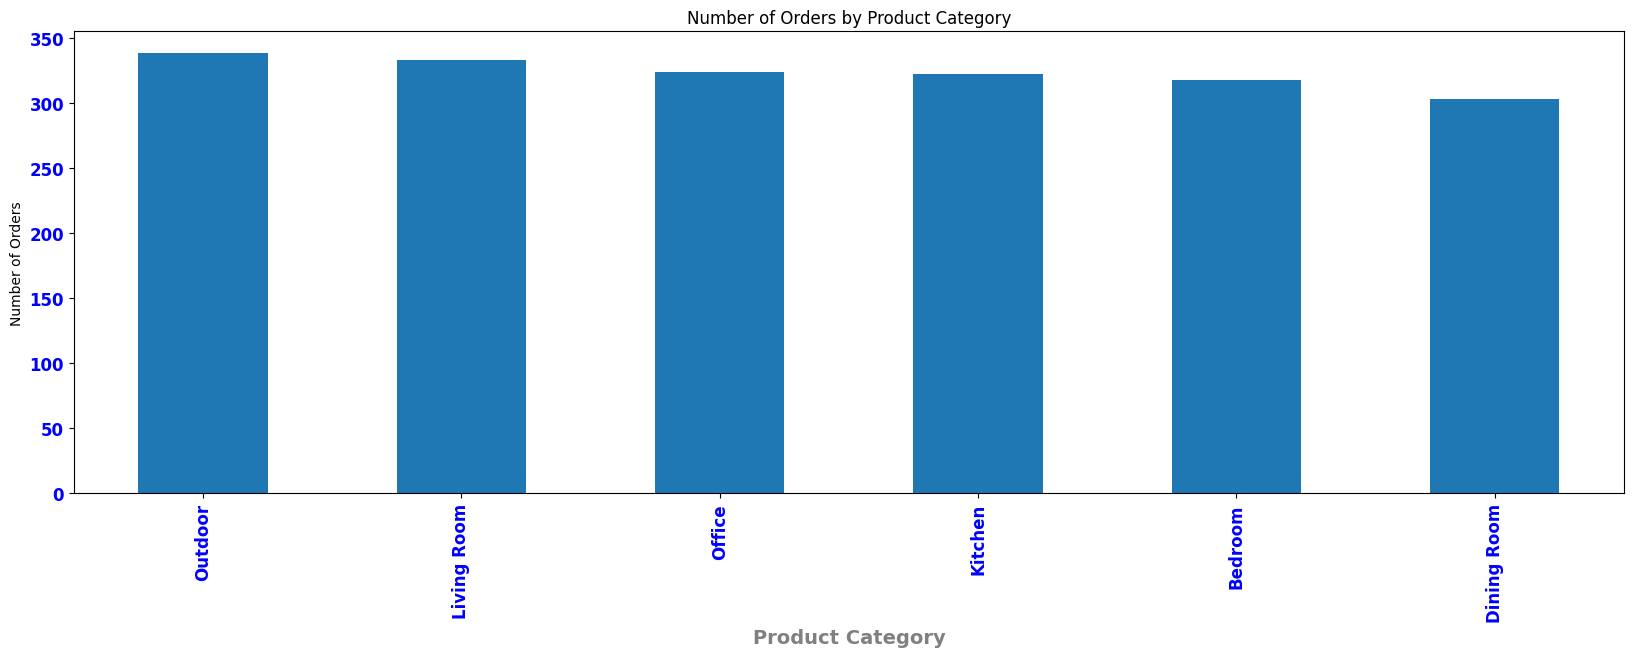

In [41]:
plt.figure(figsize=(20,6)) # edit the height and width
categories.plot(kind = 'bar') #type of vizzz like a bar or line or pie. or scatter or boxplot etc
plt.xlabel('Product Category', fontsize = 14, fontweight = 'bold', color = 'grey') # used to edit the x label. you can add on extra functions like fontsize, fontweight, color, alpha
plt.xticks(fontsize=12, fontweight='bold', color='blue') # change the x ticks
plt.ylabel('Number of Orders')
plt.yticks(fontsize=12, fontweight='bold', color='blue') # or the y ticks naturally
plt.title('Number of Orders by Product Category')
plt.show()

That didnt tell us much... maybe lets find out the type of products people generally need help with assembly on

In [46]:
assembly = df[['product_subcategory','assembly_service_requested']].value_counts()
assembly

,,count
product_subcategory,assembly_service_requested,
Bar Cart,False,50
Garden Chair,False,49
Office Chair,True,45
Pantry Cabinet,True,45
Umbrella,True,43
...,...,...
Bed Frame,True,22
Nightstand,True,21
Armchair,False,20


nice... but lets clean this up a bit

In [47]:
assembly_summary = pd.crosstab(df['product_subcategory'],df['assembly_service_requested'])
assembly_summary

assembly_service_requested,False,True
product_subcategory,,
Armchair,20,30
Bar Cart,50,40
Bar Stool,17,27
Bed Frame,29,22
Bookshelf,27,42
Buffet,35,25
Chest of Drawers,24,26
China Cabinet,30,31
Coffee Table,22,30


Thats good, but hard to read... maybe i show the % true for assemnbly requested

In [51]:
assembly_summary['Total'] = assembly_summary[False] + assembly_summary[True]
assembly_summary['Pct_True'] = assembly_summary[True] / assembly_summary['Total'] * 100

assembly_summary.sort_values(by = 'Pct_True', ascending = False)

assembly_service_requested,False,True,Total,Pct_True
product_subcategory,,,,
Umbrella,22,43,65,66.153846
Patio Set,18,35,53,66.037736
Office Chair,28,45,73,61.643836
Bar Stool,17,27,44,61.363636
Bookshelf,27,42,69,60.869565
Armchair,20,30,50,60.000000
Coffee Table,22,30,52,57.692308
Filing Cabinet,24,29,53,54.716981
Sofa,29,34,63,53.968254


At this point i understand the dataset I am working with is completely fabricated.

anyways i am going to plot it and show the mean % of orders that requested assembly

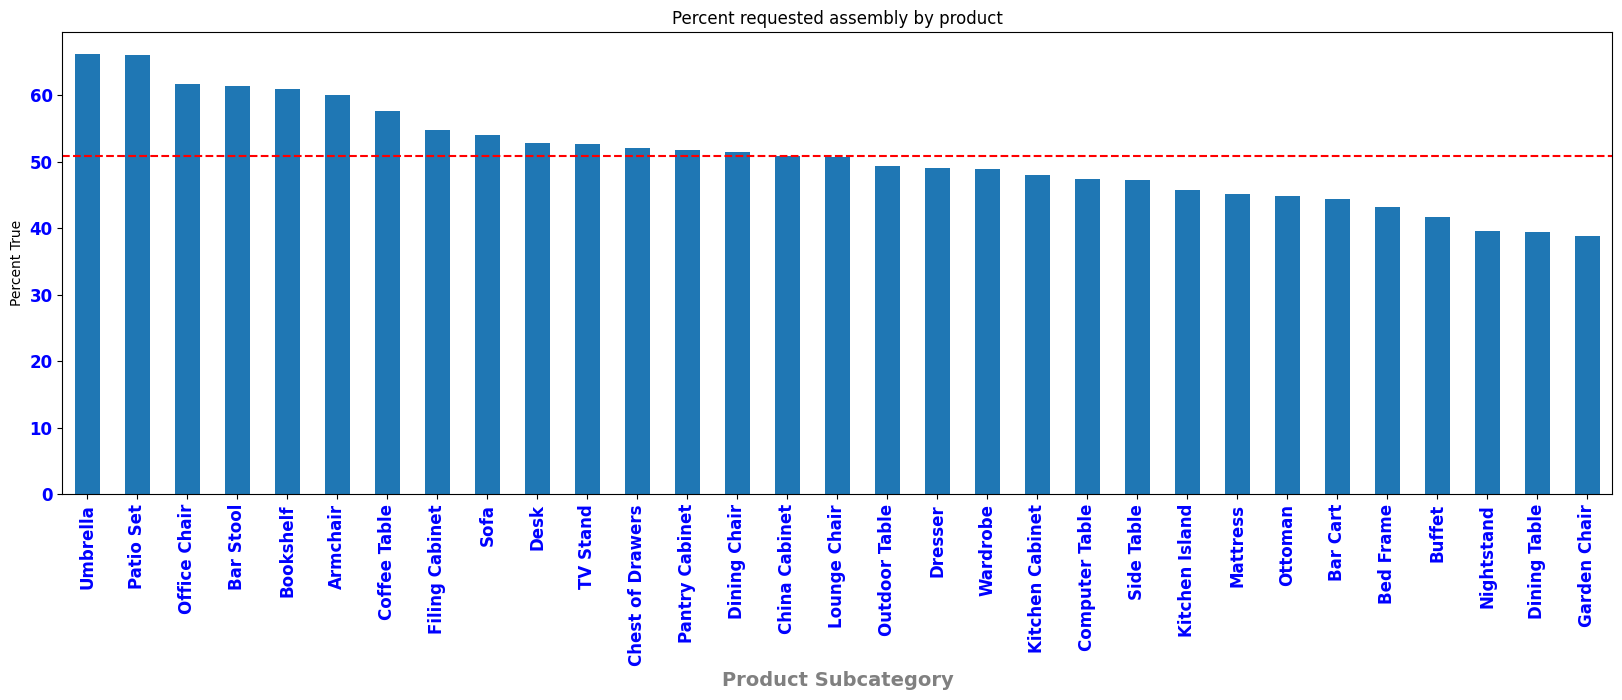

In [54]:
plt.figure(figsize=(20,6))
assembly_summary['Pct_True'].sort_values(ascending = False).plot(kind = 'bar')
plt.axhline(y = assembly_summary['Pct_True'].mean(), color = 'r', linestyle = '--')
plt.xlabel('Product Subcategory', fontsize = 14, fontweight = 'bold', color = 'grey')
plt.xticks(fontsize=12, fontweight='bold', color='blue')
plt.ylabel('Percent True')
plt.yticks(fontsize=12, fontweight='bold', color='blue')
plt.title('Percent requested assembly by product')
plt.show()

Lets find out which items are most frequently purchased together

First i'm going to make a list of order id and product subcat


In [55]:
basket = (
    df.groupby('order_id')['product_subcategory']
      .apply(list)
)


Then I am going to show pairs and count of occurences in descending order

In [57]:
from itertools import combinations
from collections import Counter

pair_counter = Counter()

for products in basket:
    # only consider orders with at least 2 products
    if len(products) > 1:
        for combo in combinations(sorted(products), 2):
            pair_counter[combo] += 1

# Turn into a DataFrame
pairs_df = pd.DataFrame(pair_counter.most_common(), columns=['Pair','Count'])
print(pairs_df.head(100))


                                Pair  Count
0   (Kitchen Island, Pantry Cabinet)      1
1   (Kitchen Cabinet, Outdoor Table)      1
2       (Dining Chair, Garden Chair)      1
3       (Kitchen Cabinet, Patio Set)      1
4             (Bed Frame, Bed Frame)      1
5         (Bar Cart, Pantry Cabinet)      1
6          (Bar Stool, Garden Chair)      1
7      (China Cabinet, Dining Chair)      1
8           (Lounge Chair, Mattress)      1
9              (Bar Cart, Bar Stool)      1
10              (Desk, Lounge Chair)      1
11    (Coffee Table, Kitchen Island)      1
12          (Dining Chair, TV Stand)      1
13  (China Cabinet, Kitchen Cabinet)      1
14                 (Desk, Patio Set)      1
15      (Bar Cart, Chest of Drawers)      1
16       (China Cabinet, Side Table)      1
17       (Computer Table, Patio Set)      1
18          (Buffet, Computer Table)      1
19         (Office Chair, Patio Set)      1
20                  (Sofa, Umbrella)      1
21     (China Cabinet, Dining Ta

this makes intuitive sense... kitchen island, pantry cabinet etc.

I was going to analyze if this is based off pure chance or if there is a probability pattern (causation analysis) but there is only one pair for each group. so hard to say in this test data...